# Loan Application Study

## Table of Contents
- [Introduction](#intro)
- [Getting Aggregations from Previous Dataset](#prev)
- [Working with All Applications (Previous & Current)](#all)
    - [Data Wrangling](#wrangling)
    - [Exploratory Data Analysis](#eda)
    - [Conclusion of Analysis](#conclusions)
    - [Modeling](#modeling)



<a id='introduction'></a>
## Introduction
> **Business Overview:**
The business revolves around providing financial assistance to individuals or businesses in the form of loans.\
When someone applies for a loan, they are requesting a specific amount of money to be lent to them for a defined purpose.\
The lending institution evaluates the applicant's creditworthiness, risk profile, and financial stability to make informed decisions about granting or denying the loan.
>
> **Problem Statement:**
> The problem is to predict whether a applicant who is approved with a loan will repay or default based on the applicant's information.
> 
> **Data set:** You can find it [here](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=application_data.csv) on Kaggle. Consists of two files: current application data and previous applications data.
>
> **Strategy of using both datasets:**
> I will use the previous dataset only to get aggregated information about the applicant's history.\
Then I will merge it with the current application data to get the final dataset for analysis.

> ### Questions for Analysis we need to answer.
> 
> * **Studying of clients' demographics**
>
> * **Applicant's info**
>   1. How does the clients' Demographics such as the age related to the approval?
>   2. Is there a relation between income and the approval of loan?
>   3. How does the type of work or housing sitiuation related to the approval?
>
> * **Application's info**
>   1. Is there an optimal day of the week or time of day for applicants to submit their loan requests for higher approval chances?
>   2. Which most important documents that are necessary for the approval?

### Imports & Configrations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

curr_df = pd.read_csv('./Dataset/application_data.csv')
prev_df = pd.read_csv('./Dataset/previous_application.csv')

curr_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
prev_df.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


> Making the names of the columns in lower case for simplicity

In [3]:
curr_lower_case_columns_dict = {column: column.lower() for column in curr_df.columns}
prev_lower_case_columns_dict = {column: column.lower() for column in prev_df.columns}

curr_df.rename(columns=curr_lower_case_columns_dict, inplace=True)
prev_df.rename(columns=prev_lower_case_columns_dict, inplace=True)

curr_df.head(1)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Functions we will use

In [159]:
def get_unique_values(dataframe):
    """
    Getting the unique values for each column in the dataframe
    """
    for column in dataframe.columns:
        unique_values = dataframe[column].value_counts()
        print(f'Column: {column} \n{unique_values}\n\n')
        
        
def get_previous_status(row, threshold=0.1):
    """
    Returns the previous status as 'Good' = 1 or 'Bad' = -1 based on the approval and rejection rates
    Inputs:
        row: A row of the dataframe
        threshold: The threshold that cause giving 'Good' sign hard a bit. [Minimising the risk]
    
    Returns:
        1: If the previous status was good
        -1: If the previous status was bad
        0: If the previous status was neutral
    """
    
    status = row.approval_rate - row.rejection_rate
    
    if status > threshold:
        return 1
    elif 0 < status < threshold:
        return 0
    else:
        return -1

def get_percentage_of_missing(dataframe, sort=True):
    """
        Getting the percentage of missing values in the dataframe
        Input:
            dataframe
        Output:
            percentage: like .value_counts() but with column name and the corresponding % of missing value.
    """
    columns_with_missing_values = dataframe.loc[:, dataframe.isna().sum() > 0]
    percentages = (columns_with_missing_values.isna().sum() / dataframe.shape[0]) * 100
    
    if sort == True:
        percentages = percentages.sort_values(ascending=False)
        
    return percentages


def get_occupation_type(row):
    """
        Getting the most appearing job based on the organization and the education type
        
        Inpust:
            row: a row with data of the applicant's application
        Output:
            job: The most appearing job in case of the provided organization & education
    """
    changed = False
    if not pd.isnull(row.occupation_type): # If not missing value
        job = row.occupation_type
        
    else:
        organization = row.organization_type
        education    = row.name_education_type
        compination  = (organization, education)
        
        if compination in grouped_data.index: # if the compination of the organization and the education exists
            job = grouped_data[(organization, education)].idxmax()
            
        else: # if not, take based only the organization
            job = grouped_data[organization].sort_values(ascending=False).reset_index().occupation_type[0]
            
    return job


def get_numbers(string):
    numbers = ''
    for letter in string:
        if letter.isdigit():
            numbers += letter
    return numbers
    
    
################## Plotting Functions ####################33

color_plate_1 = ['#547053', '#789d83', '#b78d37', '#604422', '#274532', '#905626', '#304f4d', '#7d888e', '#c8c6a9']
color_plate_2 = ['#1d4c76', '#1d2746', '#7b96b2', '#6381aa', '#9d8aab', '#85bee6', '#31312a', '#58606f', '#bbb7bf']
maps = ['tab20b']


def plot_categorical_pie(dataframe, column, labels=None, title=None):
    """
    SUMMERY: Function to plot pie chart for the categories on specific column.
    
    Inputs:
        dataframe: (pd.DataFrame) the DataFrame containing the data.
        column: (str) column name for which to chart the pie chart.
        title: (str) title of the pie chart.
        
    Output:
        Displaying the pie chart.
    """
    values = dataframe[column].value_counts().values
    
    if labels is None:
        labels = dataframe[column].value_counts().index.tolist()
        
    if title is None:
        title = f'Distribution of {column}'
    
    
    sns.set()
    colors = color_plate_2[:len(labels)]
    # fig = plt.figure(figsize =(5, 7))
    plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%', textprops={'color': "w"})
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.title(title)
    plt.show()
    
def boxplot(dataframe, column_name):
    """
        Plotting the distribution of a column with boxplot
    """
    
    sns.boxplot(x=column_name, data=dataframe);

    # Calculate and plot the mean as a red point
    mean_value = dataframe[column_name].mean()
    plt.plot(mean_value, 0, marker='o', markersize=8, color='red', label='Mean');
    plt.title(f'Distribution of the {column_name}')
    plt.legend();
    
def get_propotions(DataFrame, column_name, target='target'):
    """
        SUMMERY:
            TO GIVE PROPOTIONS OF THE VALUES IN THE COLUMNS.
        TAKE:
            column_name: (str) for the column we need to get propotions on it.
            DataFrame: (DataFrame) for the data frame we need to make propotions on it.
            target(optional): if not passed, this will get propotions between the column & target
                              if passed any column this will get propotions between these 2 columns
                              Actually the 2 options are [target, prev_status]
        RETURN:
            propotions
     """ 
    
    total_values_for_each_category = DataFrame.groupby([column_name])[target].count()
    
    # Getting the count of all who are repaied for each category and count of all who didn't in each category.
    values_of_repaying = DataFrame.groupby([column_name, target])[target].count()
    
    # To be fair we do not use ValuesFor_Show_noShow but we divide it by the TotalValues
    # as our data have different numbers of rows for each category .. so to be fair we divide each 
    # count of patients who showed up in category X by the total number of patients in this category.
    propotions = values_of_repaying / total_values_for_each_category
    
    return propotions


def PlotPropotions(propotions, rot=90):
    # Propotions come from get_propotion function.
    color_map = np.random.choice(maps)
    
    labels = propotions.unstack().index.tolist()
    column1, column2 = propotions.keys().names
    
    propotions.unstack().plot(kind='bar', cmap=color_map);
    plt.ylabel('Avg')
    plt.xlabel('');
    plt.title(f'{column1} & {column2}', fontsize=15, fontweight='bold')
    
    if column2 == 'target': 
        plt.legend(labels=['Repayers', 'Defaulters'], fontsize=14, bbox_to_anchor=(1.05, 0.7));
    else:
        plt.legend(fontsize=14, bbox_to_anchor=(1.05, 0.7));
      
    plt.xticks(range(len(labels)), labels, rotation=rot);

<a id='previous-dataset'></a>

## Getting aggregations from previous dataset

In [5]:
prev_df.groupby(['sk_id_curr', 'sk_id_prev']).count()['name_contract_type'].head()

sk_id_curr  sk_id_prev
100001      1369693       1
100002      1038818       1
100003      1810518       1
            2396755       1
            2636178       1
Name: name_contract_type, dtype: int64

> There are many current applications that have previous applications.
> 
> For this reason we will aggregate the previous applications data to get the insights we need and then merge it with the current applications data.

In [6]:
# Dataframe we will save our aggregated data to
agg_df = pd.DataFrame()

> **For approved applications:**
> 1. The average amount of credit taken by the applicant.
> 2. The average amount of annuity approved for the applicant.

> **Note**: for approved only due to get intiuation about how much the applicant can pay back.

> Calculating the avg amout of credit taken by the applicant
> 
> **amt_application** -> is the amount of credit requested by the applicant.\
> **amt_credit** -> is the amount of credit granted to the applicant.
> 
> **Notice**: So, we will use amt_creadit for approved applications.

In [7]:
approved_df = prev_df.query('name_contract_status == "Approved"')

approved_df = approved_df.groupby('sk_id_curr').agg({
    'amt_credit': 'mean',
    'amt_annuity': 'mean',
    })

> **For only approved and refused applications as our target is to approve or refuse the loan:**

In [8]:
grouped_data_approval_refusion = prev_df.groupby(['sk_id_curr', 'name_contract_status']).count().unstack(fill_value=0)['sk_id_prev']

agg_df['approval_rate'] = grouped_data_approval_refusion['Approved'] / grouped_data_approval_refusion.sum(axis=1)
agg_df['rejection_rate'] = grouped_data_approval_refusion['Refused'] / grouped_data_approval_refusion.sum(axis=1)

agg_df['prev_status'] = agg_df.apply(lambda row: get_previous_status(row), axis=1)

In [9]:
# No need for the approval and rejection rates anymore
agg_df.drop(columns=['approval_rate', 'rejection_rate'], inplace=True)

# Merging the 2 aggregation datasets
agg_df = approved_df.merge(agg_df, on='sk_id_curr', how='inner')

In [10]:
# Renaming the columns
agg_df.rename(columns={'amt_credit': 'prev_avg_approved_credit', 'amt_annuity': 'prev_avg_approved_annuity'}, inplace=True)

In [156]:
agg_df.query('sk_id_curr in [100002, 100003, 1100030, 100072, 100035]') # .. 100072, 100193
# agg_df.query('prev_status == -1') # .. 100030, 100035
# agg_df.iloc[[100001, 100072, 100002, 100035, 100193]]

,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
sk_id_curr,,,
100002,179055.0000,9251.77500,1
100003,484191.0000,56553.99000,1
100035,203042.8125,16788.74625,-1
100072,133302.0000,12358.00500,0


In [142]:
agg_df.sample(5)

,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
sk_id_curr,,,
144189,99659.25,16799.26500,1
396829,97746.00,6646.74000,1
418530,168642.00,11224.90500,-1
288337,54423.00,4474.89750,1
276200,61337.25,8611.77375,1


In [111]:
# The Nan values here will be error in data, so we will drop them
agg_df.isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    0
prev_status                  0
dtype: int64

In [112]:
agg_df.dropna(inplace=True)
agg_df.isna().any()

prev_avg_approved_credit     False
prev_avg_approved_annuity    False
prev_status                  False
dtype: bool

> Now we finished getting features we need from the previous data, Now lets add these aggreagated values with the current dataset

In [14]:
df = curr_df.merge(agg_df, on='sk_id_curr', how='left')
df.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


## Working with all the applications [prev & curr]

### Data Assessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 125 entries, sk_id_curr to prev_status
dtypes: float64(68), int64(41), object(16)
memory usage: 295.6+ MB


> Checking for duplicated documets

In [16]:
print(f'Number of duplicats in applications is: {int(df.duplicated().any())}')

Number of duplicats in applications is: 0


> Checking how much new documents that not have history

In [17]:
print(f'There are {df.prev_status.isna().sum()} new docs that are not having history')

There are 17448 new docs that are not having history


> Missing data in columns

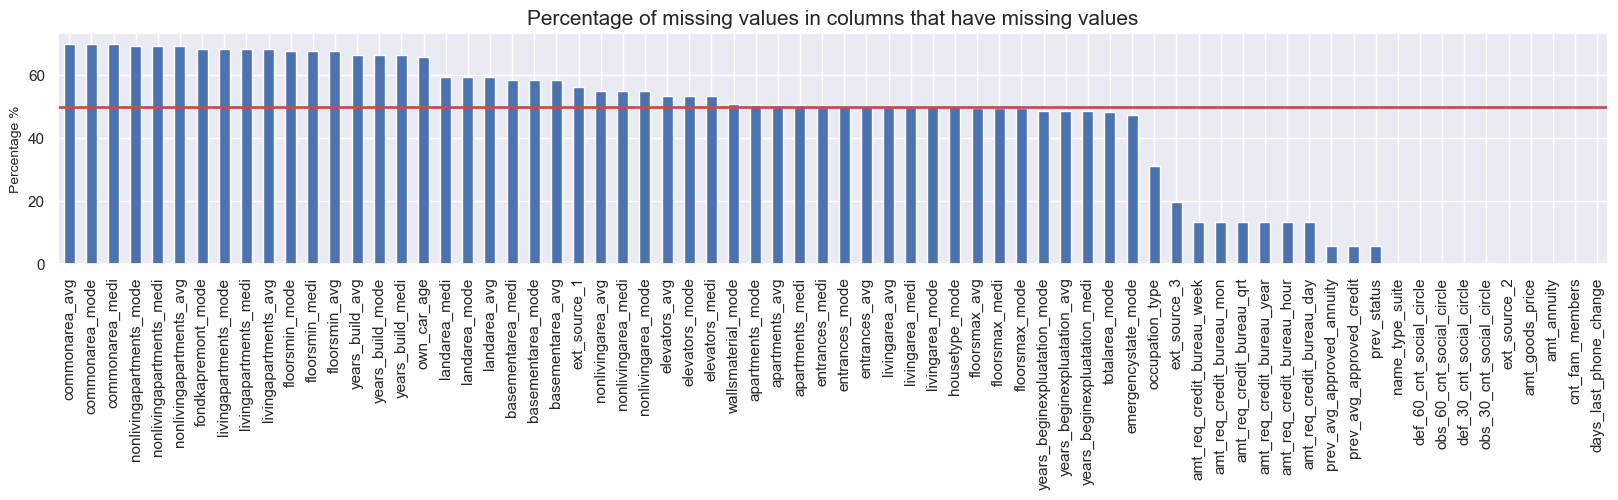

In [18]:
percentage_per_column = get_percentage_of_missing(df)

percentage_per_column.plot(kind='bar', figsize=(20, 3));
plt.axhline(50, c='r', linewidth=2);
plt.title('Percentage of missing values in columns that have missing values', fontsize=15);
plt.ylabel('Percentage %', fontsize=10);

> Columns with more than 50% missing values will be dropped.

#### Checking categorical columns
> 
> * We will take all the not numeric featuers.
> 
> * We will add to them all the numeric features that has a # unique values < threshould = 8.
>
>   * **Note**: Threshould chosen to `8` after considering the columns for the `name_income_type` column

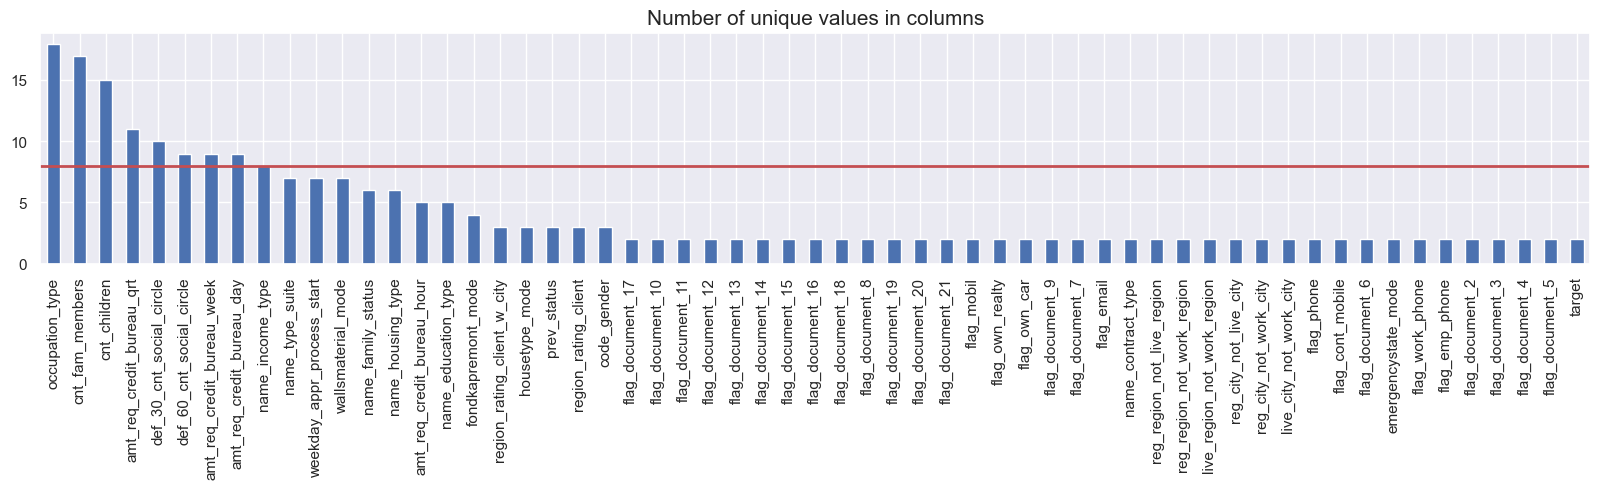

In [19]:
threshould = 8
suggested_categorical_columns = df.loc[:, df.nunique() < 24].nunique().sort_values(ascending=False)

suggested_categorical_columns.plot(kind='bar', figsize=(20, 3));
plt.axhline(threshould, c='r', linewidth=2);
plt.title('Number of unique values in columns', fontsize=15);

> * Most categorical columns are `Binary`.
> * Columns under the line considered categorical.
> * **Exception:** There are some columns under the threshould not categorical columns such as:\
`amt_req_credit_bureau_hour` as it is the number of enquiries to Credit Bureau about the client one hour before application

In [20]:
threshoulded_columns = df.loc[:, (df.nunique().sort_values(ascending=False) < threshould)].columns
string_columns = df.select_dtypes(exclude=np.number).columns

categorical_columns = set(list(threshoulded_columns) + list(string_columns))

In [21]:
categorical_df = df.loc[:, categorical_columns]

In [22]:
categorical_df.drop(columns='amt_req_credit_bureau_hour', inplace=True)

> Checking missing values in categorical columns

In [23]:
get_percentage_of_missing(categorical_df)

fondkapremont_mode     68.386172
wallsmaterial_mode     50.840783
housetype_mode         50.176091
emergencystate_mode    47.398304
occupation_type        31.345545
prev_status             5.673943
name_type_suite         0.420148
dtype: float64

> `fondkapremont_mode`, `wallsmaterial_mode`, `housetype_mode`, `emergencystate_mode` will be droped as they have missing values ~ 50%.
> 
> `prev_status` column null values comes from not having a history, So we will handel it with `0` as not approved or rejected before.
> 
> `name_type_suite` missing values will replaced with `Unaccompanied` as `the mode`.

> Checking the unique values in categorical columns

In [24]:
get_unique_values(categorical_df)

Column: region_rating_client 
2    226984
3     48330
1     32197
Name: region_rating_client, dtype: int64


Column: region_rating_client_w_city 
2    229484
3     43860
1     34167
Name: region_rating_client_w_city, dtype: int64


Column: flag_document_5 
0    302863
1      4648
Name: flag_document_5, dtype: int64


Column: flag_document_16 
0    304458
1      3053
Name: flag_document_16, dtype: int64


Column: flag_document_10 
0    307504
1         7
Name: flag_document_10, dtype: int64


Column: flag_document_4 
0    307486
1        25
Name: flag_document_4, dtype: int64


Column: name_income_type 
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: name_income_type, dtype: int64


Column: flag_own_car 
N    202924
Y    104587
Name: flag_own_car, dtype: int64


Column: name_family_st

There are values that is not make sense and just added to indicate a null such as:
> * **code_gender** has `XNA` value.
> * **name_family_status** has `Unknown` value.
> * **organization_type** has `XNA` value also.

#### Checking numerical columns

In [25]:
numeric_df = df.select_dtypes(np.number)
numeric_df.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,totalarea_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,2.900630e+05,290063.000000,290063.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553

> **Noticed** Columns of days such as `days_birth`, `days_registration`, etc, are in **Negative** values.

#### Checking the output

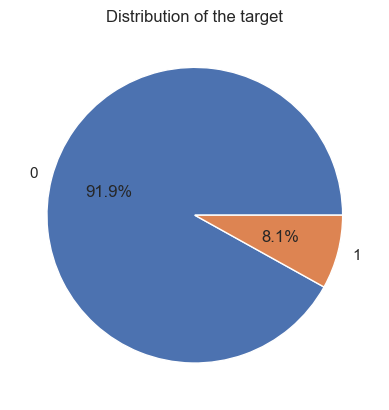

In [26]:
value_counts = df.target.value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%');
plt.title('Distribution of the target');
plt.ylabel('');

> The data is heighly biased
>
> We could use Tree based algorithms with class weight to handel this problem.

### Data Cleaning

#### Operations on whole dataset.
>
> The transformation values will come from only the train set, then applied to both train, test. `[Handling Data Leakage]`

> First lets give `0` for all null values in the columns come from the previous docs.

In [226]:
df.iloc[:, -3:].isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    0
prev_status                  0
dtype: int64

In [227]:
df.iloc[:, -3:] = df.iloc[:, -3:].fillna(0)
df.iloc[:, -3:].isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    0
prev_status                  0
dtype: int64

> lets drop all columns with % missing values >= 47%
> 
> As the columns that have missing perc between 50% to 47% are columns of the same info about the bulding the applicant lives it.

In [228]:
missing_percentages = get_percentage_of_missing(df)
missing_greater_47 = missing_percentages[missing_percentages >= 47].index.tolist()

In [229]:
df.drop(columns=missing_greater_47, inplace=True)

df.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


#### Operations [transformations] on the train set
> All we do in the train will be applied also for test seperately

In [230]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['sk_id_curr', 'target']), df.target, test_size=0.2, random_state=42)

##### Cleaning columns with `object` or `string` data types.

**Handling notes from data assessing**

> Not good values in some columns that indicates null

In [231]:
# Converting them to null values to handel them as nulls

x_train.code_gender[x_train.code_gender == 'XNA'] = np.nan
x_test.code_gender[x_test.code_gender == 'XNA'] = np.nan

x_train.name_family_status[x_train.name_family_status == 'Unknown'] = np.nan
x_test.code_gender[x_test.name_family_status == 'Unknown'] = np.nan


# x_train.organization_type[x_train.organization_type == 'XNA'] = np.nan
# x_test.organization_type[x_test.organization_type == 'XNA'] = np.nan

In [232]:
x_train.select_dtypes(include=np.object).isna().sum()

name_contract_type                0
code_gender                       3
flag_own_car                      0
flag_own_realty                   0
name_type_suite                1046
name_income_type                  0
name_education_type               0
name_family_status                1
name_housing_type                 0
occupation_type               77106
weekday_appr_process_start        0
organization_type                 0
dtype: int64

> We let the `code_gender`, `name_family_status`, `name_type_suite` to be handeled with other categorical `numerical` columns with mode.

> **Handling the `occupation_type` column**
> * Using the `organization_type` & `name_education_type` columns **That have no null values** and **related to work** to fill missing values in the `occupation_type` column.
> 
> * Only used x_train to create the source data of imputation, not the whole dataset `[Data Leakage Handling]`.

In [233]:
grouped_data = x_train.groupby(['organization_type', 'name_education_type', 'occupation_type']).count()['name_contract_type']
grouped_data.head()

organization_type  name_education_type  occupation_type      
Advertising        Higher education     Accountants              12
                                        Core staff               48
                                        Drivers                   2
                                        High skill tech staff     8
                                        IT staff                  1
Name: name_contract_type, dtype: int64

In [234]:
# Befor
print(f'Befor, The job of the applicant no 8 is: {x_train.occupation_type[8]}')

Befor, The job of the applicant no 8 is: nan


In [235]:
# applay the data from only the train set into train, test sets.
x_train['occupation_type'] = x_train.apply(lambda row: get_occupation_type(row), axis=1)
x_test['occupation_type'] = x_test.apply(lambda row: get_occupation_type(row), axis=1)

In [236]:
print(f'After, The job of the applicant no 8 is: {x_train.occupation_type[8]}')

After, The job of the applicant no 8 is: Cleaning staff


##### Cleaning existing columns, columns with `numeric` data types.

**Handling the noticed notes on the `days columns` we took in the data assessing**

> They have **Negative** values.

In [237]:
days_columns = ['days_birth', 'days_id_publish', 'days_registration', 'days_employed', 'days_last_phone_change']
x_train[days_columns].head(1)

,days_birth,days_id_publish,days_registration,days_employed,days_last_phone_change
123473,-23349,-4408,-3595.0,365243,-2058.0


In [238]:
x_train[days_columns] = x_train[days_columns].abs()
x_test[days_columns] = x_test[days_columns].abs()

x_train[days_columns].head(1)

,days_birth,days_id_publish,days_registration,days_employed,days_last_phone_change
123473,23349,4408,3595.0,365243,2058.0


Converting the number of days into number of years in the `days_birth` to be significant in analysis, renaming it to `age`

In [239]:
x_train.days_birth = x_train.days_birth / 365
x_test.days_birth = x_test.days_birth / 365

x_train.rename(columns={'days_birth': 'age'}, inplace=True)
x_test.rename(columns={'days_birth': 'age'}, inplace=True)

> Cleaning missing values in exisiting columns

In [240]:
get_percentage_of_missing(x_train)

ext_source_3                  19.846509
amt_req_credit_bureau_year    13.499967
amt_req_credit_bureau_qrt     13.499967
amt_req_credit_bureau_mon     13.499967
amt_req_credit_bureau_week    13.499967
amt_req_credit_bureau_day     13.499967
amt_req_credit_bureau_hour    13.499967
name_type_suite                0.425189
obs_60_cnt_social_circle       0.327225
def_60_cnt_social_circle       0.327225
def_30_cnt_social_circle       0.327225
obs_30_cnt_social_circle       0.327225
ext_source_2                   0.215034
amt_goods_price                0.091054
amt_annuity                    0.004065
code_gender                    0.001219
days_last_phone_change         0.000406
cnt_fam_members                0.000406
name_family_status             0.000406
dtype: float64

In [241]:
columns_imputed_with_mode = ['name_family_status', 'code_gender', 'name_type_suite', 'cnt_fam_members', 'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day', 'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']
columns_imputed_with_median = ['days_last_phone_change', 'amt_annuity', 'amt_goods_price', 'ext_source_2', 'ext_source_3', 'def_60_cnt_social_circle', 'def_30_cnt_social_circle', 'obs_60_cnt_social_circle', 'obs_30_cnt_social_circle']

mode_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

mode_imputer.fit(x_train[columns_imputed_with_mode])
median_imputer.fit(x_train[columns_imputed_with_median])

x_train[columns_imputed_with_mode] = mode_imputer.transform(x_train[columns_imputed_with_mode])
x_test[columns_imputed_with_mode] = mode_imputer.transform(x_test[columns_imputed_with_mode])

x_train[columns_imputed_with_median] = median_imputer.transform(x_train[columns_imputed_with_median])
x_test[columns_imputed_with_median] = median_imputer.transform(x_test[columns_imputed_with_median])

In [242]:
print(f'Now the number of nulls in the data is: {x_train.isna().any().sum()}')

Now the number of nulls in the data is: 0


> **Cutting some columns to levels**

In [243]:
# def cutting(x_train, x_test, columns):
#     """
#         Making cutting on continuos columns
#         the bins comes from the train set only [To handel data leakage]
#     """
#     train, test = x_train.copy(), x_test.copy()
    
#     labels = [0, 1, 2, 3]
#     for column in columns:
#         minimum, low, moderate, high, maximum = train[column].describe()[3:].values
        
#         , 10bins = [minimum - 1e-10, low,moderate, high, maximum + 1e-10]
#         new_column_trian = pd.cut(train[column], bins=bins, labels=labels)
#         new_column_test = pd.cut(test[column], bins=bins, labels=labels)
        
        
#         train[column] = new_column_trian
#         test[column]  = new_column_test
    
#     return train, test

In [244]:
# columns_to_cut = ['ext_source_2', 'ext_source_3', 'amt_credit', 'amt_income_total', 'amt_annuity', 'amt_goods_price', 'age', 'days_employed', 'days_registration', 'days_id_publish', 'days_last_phone_change', 'prev_avg_approved_credit', 'prev_avg_approved_annuity']

# x_train, x_test = cutting(x_train, x_test, columns_to_cut)

> Renaming some columns

In [245]:
documents_columns = x_train.filter(like='flag_doc').columns.tolist()

column_mapping = {col: f'dock_{get_numbers(col[-2:])}' for col in documents_columns}

x_train.rename(columns=column_mapping, inplace=True)
x_test.rename(columns=column_mapping, inplace=True)

In [246]:
x_test_temp = x_test
x_train_temp = x_train

---

## Exploratory Data Analysis (EDA)

In [247]:
df_eda = pd.concat([x_train, y_train], axis=1)
df_eda.head(1)

,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,age,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,dock_2,dock_3,dock_4,dock_5,dock_6,dock_7,dock_8,dock_9,dock_10,dock_11,dock_12,dock_13,dock_14,dock_15,dock_16,dock_17,dock_18,dock_19,dock_20,dock_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status,target
123473,Cash loans,F,Y,N,0,171000.0,555273.0,16366.5,463500.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.035792,63.969863,365243,3595.0,4408,1,0,0,1,0,0,Cleaning staff,1.0,2,2,TUESDAY,9,0,0,0,0,0,0,XNA,0.358568,0.563835,0.0,0.0,0.0,0.0,2058.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,113882.785714,6254.434286,1.0,0


### Studying of clients' demographics

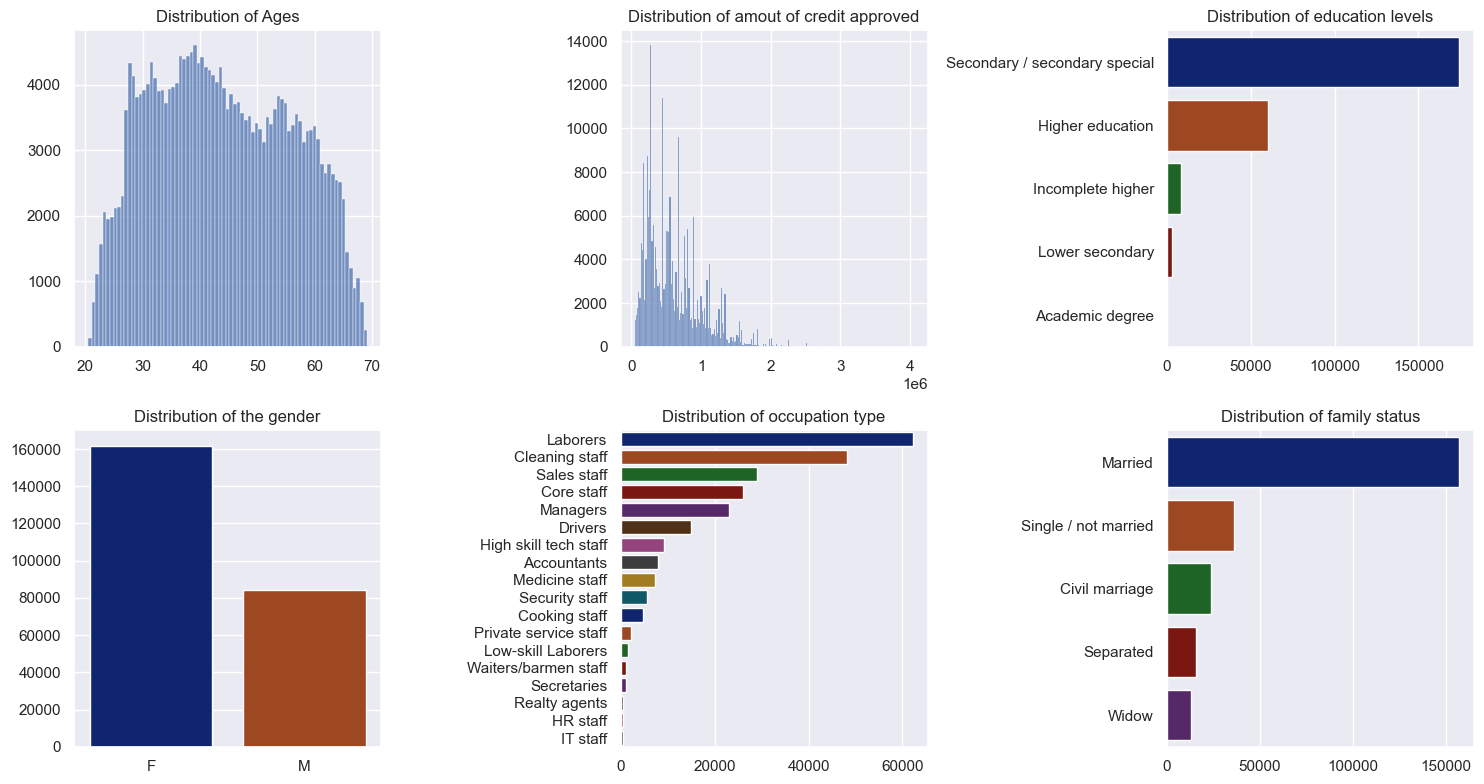

In [248]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

# demographics_columns_hist = ['days_birth', 'cnt_children', 'amt_income_total', ]

# for i, column in enumerate(demographics_columns_hist):
#     sns.countplot(data=df_train, x=column, ax=axes[0, i], palette="dark")
#     axes[0, i].set_title(f"Distribution of {column}")
    
#     axes[0, i].tick_params(axis='x', rotation=45)


# demographics_columns = ['code_gender', 'name_family_status', 'name_education_type']

# for i, column in enumerate(demographics_columns):
#     sns.countplot(data=df_train, x=column, ax=axes[1, i], palette="dark")
#     axes[1, i].set_title(f"Distribution of {column}")
    
#     axes[1, i].tick_params(axis='x', rotation=45)


sns.histplot(data=df_eda, x='age', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Ages")

sns.histplot(data=df_eda, x='amt_credit', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of amout of credit approved")


education_order = df_eda.name_education_type.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_eda, y='name_education_type', ax=axes[0, 2], palette="dark", order=education_order)
axes[0, 2].set_title(f"Distribution of education levels")
axes[0, 2].tick_params(axis='y', rotation=0)


gender_order = df_eda.code_gender.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_eda, x='code_gender', ax=axes[1, 0], palette="dark", order=gender_order)
axes[1, 0].set_title(f"Distribution of the gender")


occupation_order = df_eda.occupation_type.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_eda, y='occupation_type', ax=axes[1, 1], palette="dark", order=occupation_order)
axes[1, 1].set_title(f"Distribution of occupation type")
axes[1, 1].tick_params(axis='y', rotation=0)


status_order = df_eda.name_family_status.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_eda, y='name_family_status', ax=axes[1, 2], palette="dark", order=status_order)
axes[1, 2].set_title(f"Distribution of family status")
axes[1, 2].tick_params(axis='y', rotation=0)




for i in range(2):
    for j in range(3):
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

From **clients' demographics** we could notice that:
> * The distribution of ages among the clients appears to follow a relatively normal distribution.
> * The distribution of the amount of credit approved highlights the presence of some outliers.
> * Most of the applicants finished only their secondary education.
> * Gender-wise, the dataset leans heavily toward female applicants.
> * Among the various listed occupations, laborers and cleaning staff stand out as the most common roles among the applicants.
> * Marital status appears as the most prevalent family status, signifying its significance due to the elevated proportion of applications linked to this category.

### How related applicant's info to the target
>   1. How does the clients' Demographics such as the age stages related to de?
>   3. How does the type of work or housing sitiuation related to the approval?

In [249]:
repayers = df_eda.query('target == 0')
defaulters = df_eda.query('target == 1')

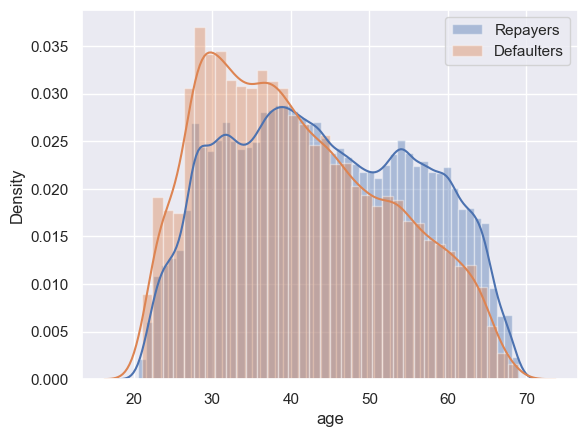

In [250]:
sns.distplot(repayers.age, label='Repayers');

sns.distplot(defaulters.age, label='Defaulters');

plt.legend();

> The older the applicant the higher chance to repay.

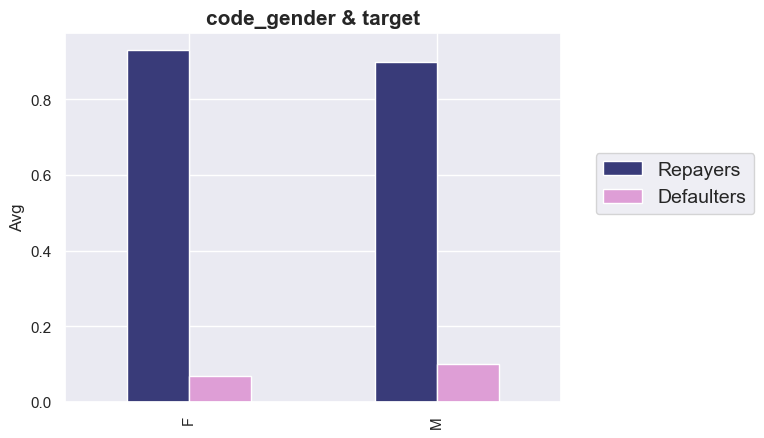

In [251]:
gender_propotions = get_propotions(df_eda, 'code_gender')

PlotPropotions(gender_propotions);

> Men are more likely to default more than women.

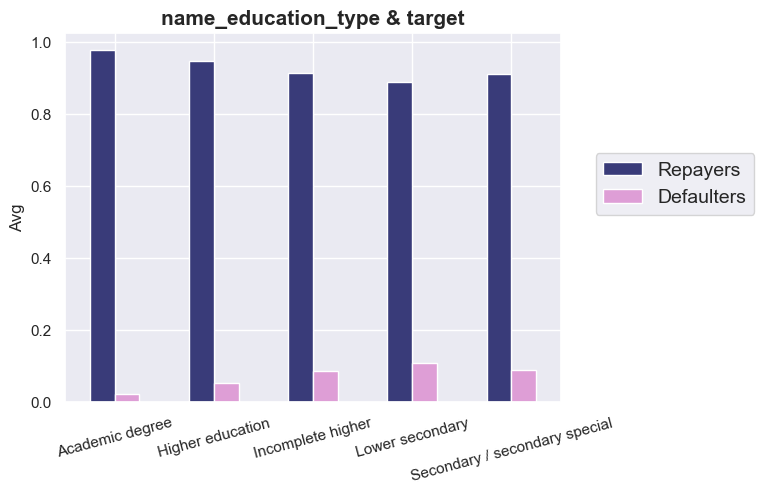

In [252]:
PlotPropotions(get_propotions(df_eda, 'name_education_type'), rot=15)

> The heighr the education level the lowr the default rate.

### How related applicant's info to the target
>   1. Which most important documents that are necessary for the approval?


> **Note** We took 1 - > to indicates the absence of these documents.

In [253]:
documents_columns = df_eda.filter(like='dock_').columns.tolist()

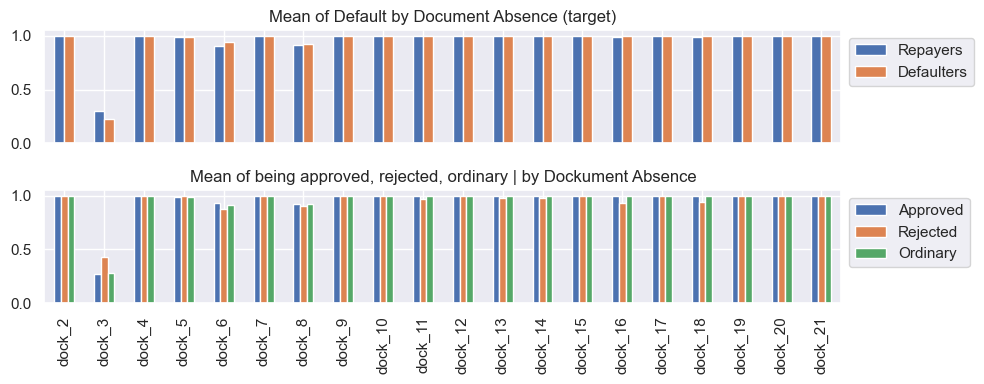

In [254]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

# We took 1 - > to indicates the absence of these documents.
mean_of_default_of_each_dock = 1 - df_eda.groupby('target').mean()[documents_columns].T
mean_of_default_of_each_dock.plot(kind='bar', figsize=(10, 4), ax=axes[0]);

axes[0].set_title('Mean of Default by Document Absence (target)')
legend_labels_0 = ['Repayers', 'Defaulters']
axes[0].legend(legend_labels_0, loc='upper left', bbox_to_anchor=(1, 1))


mean_of_default_of_each_dock = 1 - df_eda.groupby('prev_status').mean()[documents_columns].T
mean_of_default_of_each_dock.plot(kind='bar', figsize=(10, 4), ax=axes[1]);


axes[1].set_title('Mean of being approved, rejected, ordinary | by Dockument Absence')
legend_labels_1 = ['Approved', 'Rejected', 'Ordinary']
axes[1].legend(legend_labels_1, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and display the subplot
plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()
#

The last chart provides insights into the relationship between the absence of documents provided by the applicant and their previous loan approval rates, as well as the impact on the target variable (default or not).

1. Loan Approval Rates:
   * For most documents, the absence or presence of the document does not significantly impact loan approval or rejection rates.

2. Default Rates:
   * Similarly, the absence or presence of most documents does not have a notable impact on whether the applicant will default on their loan.

Based on these findings, it is recommended to consider dropping all document-related columns except for dock_3 and dock_6. These two documents appear to have a more discernible influence on loan approval and default rates.


In [255]:
dock_columns_we_drop = [column for column in documents_columns if column not in ['dock_3', 'dock_6']]
x_train.drop(columns=dock_columns_we_drop, inplace=True)
x_test.drop(columns=dock_columns_we_drop, inplace=True)

### Colleration between features with each others

> Befor that, lets use `Target Encoding` to convert categorical strig columns to be numeric

In [256]:
df_train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

cate_columns = df_train.select_dtypes(exclude=np.number).columns

encodings = {}
for column in cate_columns:
    encodings[column] = df_train.groupby(column).mean()['target']
    

for column in cate_columns:
    x_train[column] = x_train[column].map(encodings[column])
    x_test[column] = x_test[column].map(encodings[column])

In [257]:
print(f'There are {x_test.isna().sum().sum()} missing values generated in the test set.')

There are 9 missing values generated in the test set.


In [258]:
missing_rows = x_test.isna().any(axis=1)
x_test.drop(x_test.index[missing_rows], inplace=True)
y_test.drop(y_test.index[missing_rows], inplace=True)

x_test.isna().sum().sum()

0

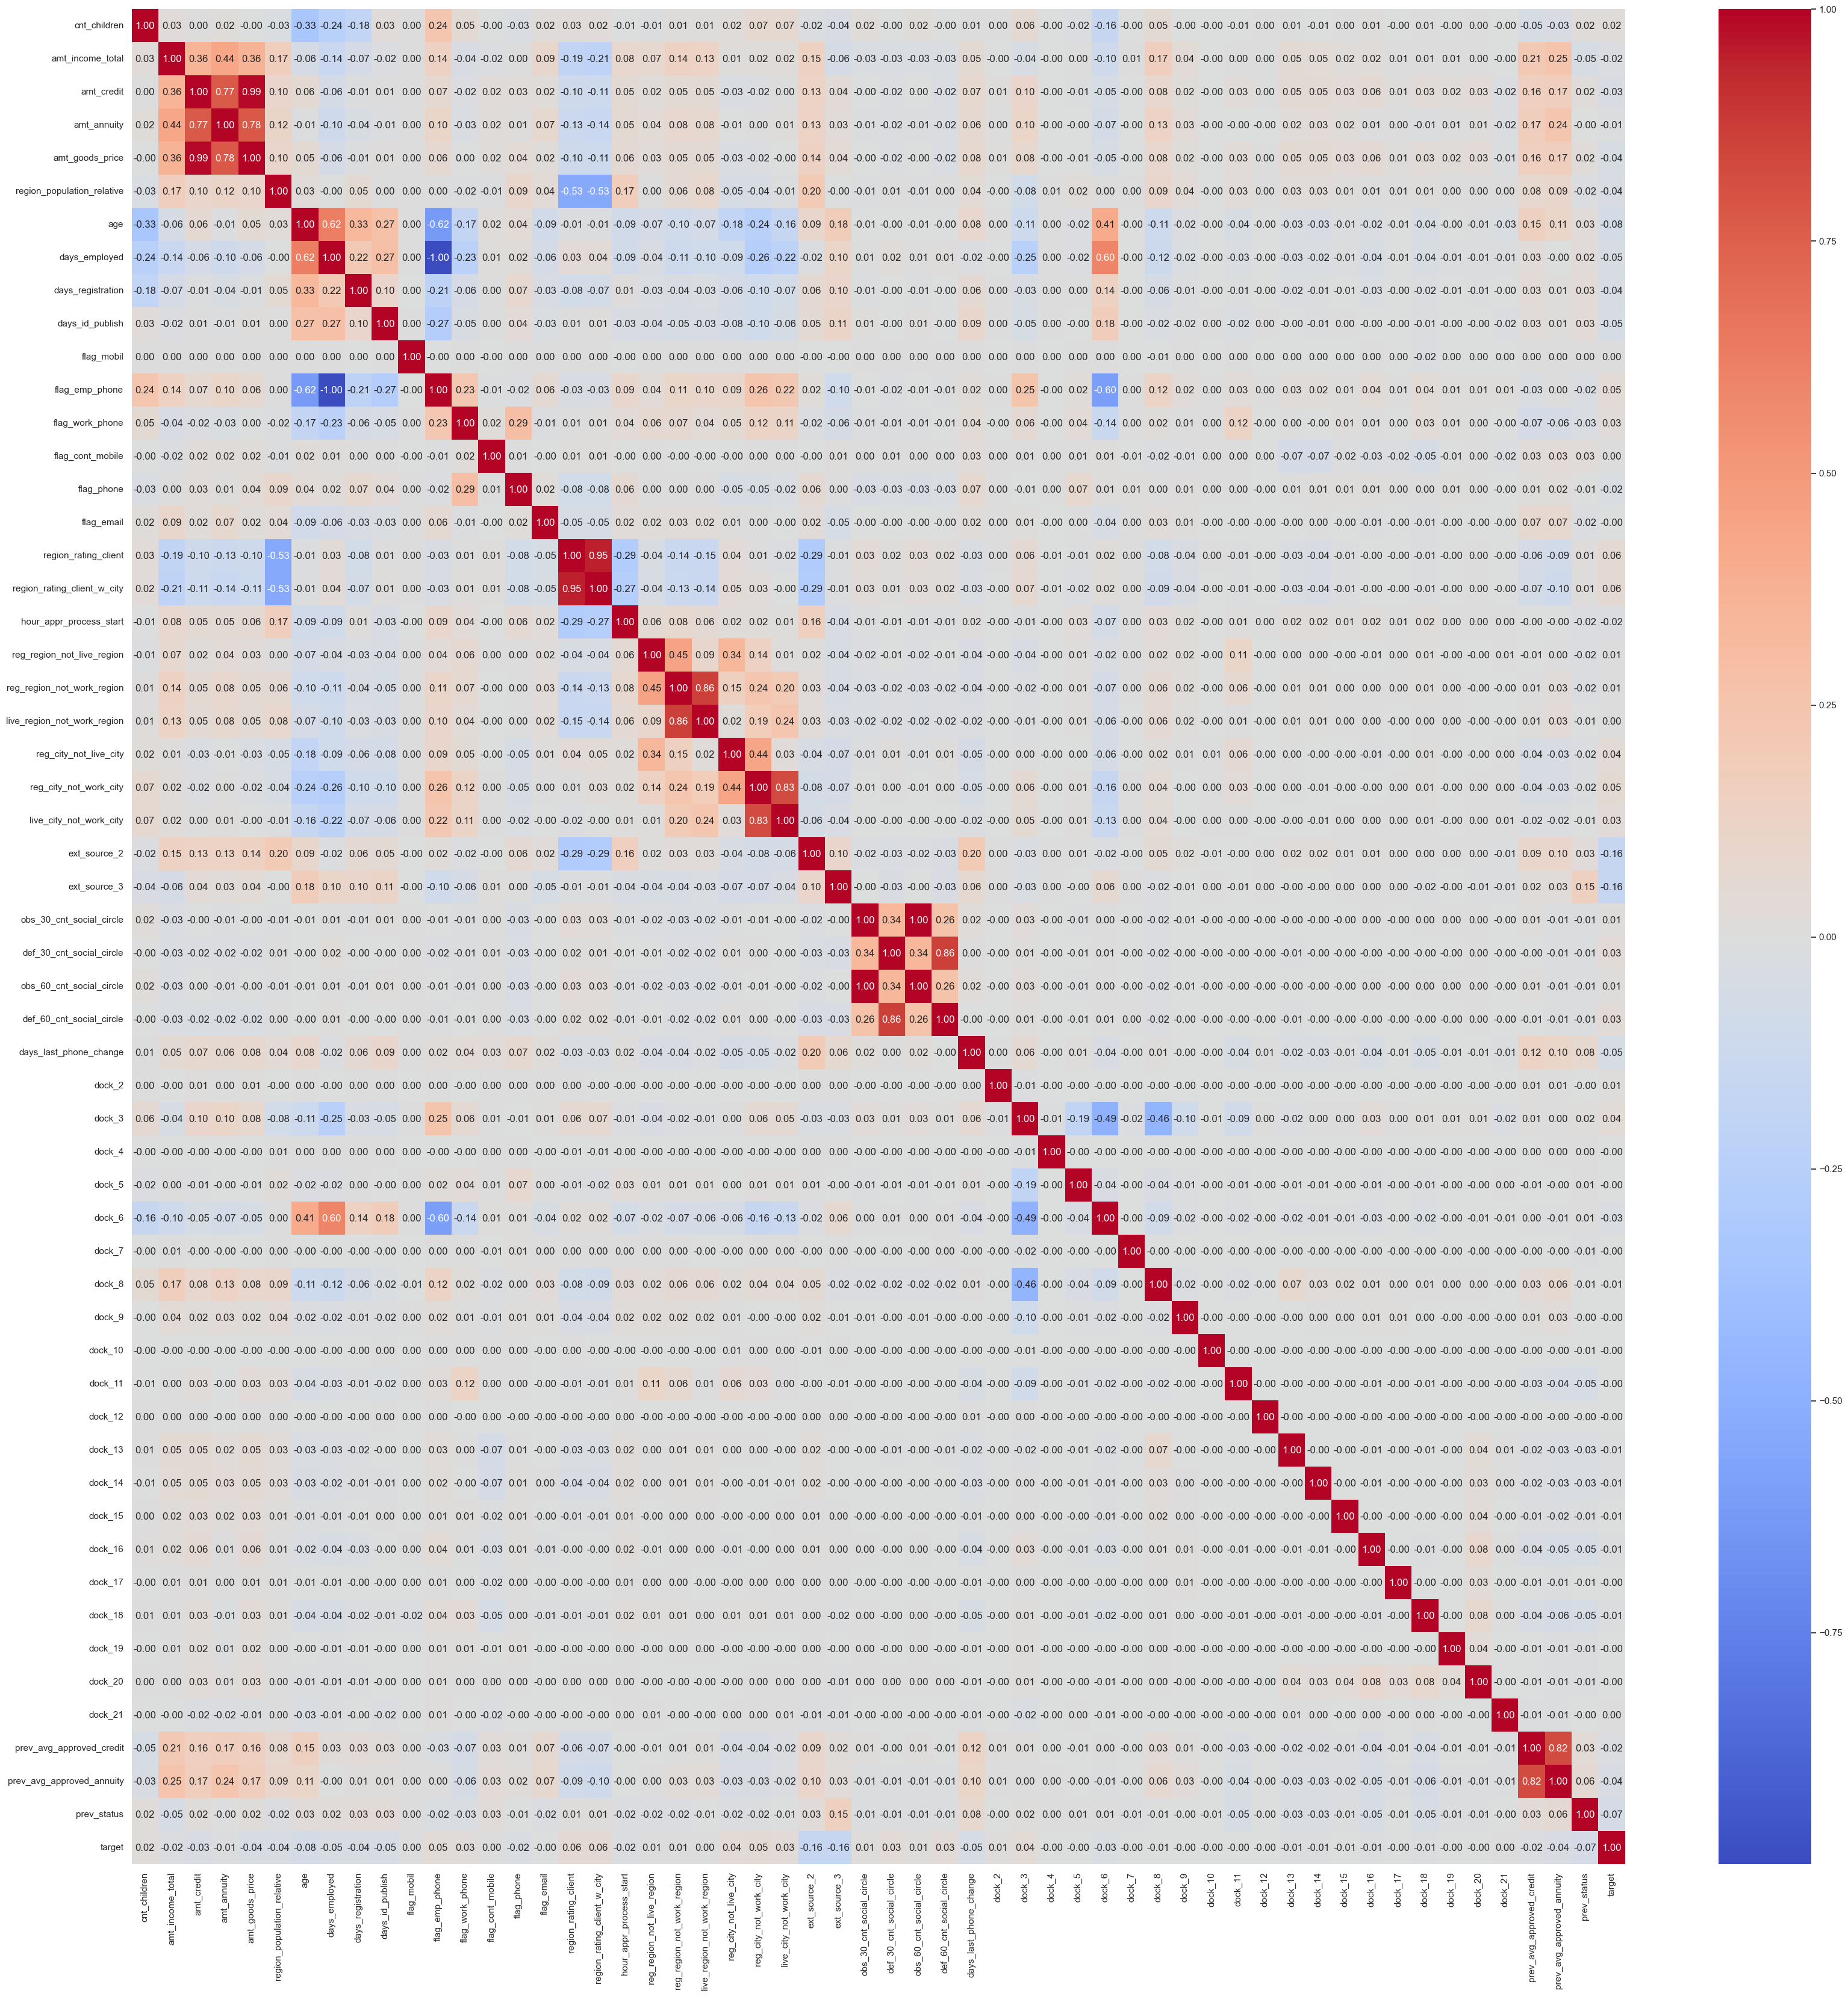

In [260]:
corr = df_eda.corr()

plt.figure(figsize=(40, 40));
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f");

> There are many collerated features with each other.

> using `VIF` to indicates the highly correlated features.

In [261]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_df = pd.DataFrame()
vif_df['Features'] = x_train.columns
vif_df['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [262]:
vif_df.sort_values(by='VIF', ascending=False).head()

,Features,VIF
19,flag_mobil,36769.290717
47,amt_req_credit_bureau_hour,17975.672110
20,flag_emp_phone,11326.287111
49,amt_req_credit_bureau_week,3162.710802
16,days_employed,2557.738436


> checking most important features

In [263]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

feature_importance = model.feature_importances_

In [264]:
agg_df.columns.tolist()

['prev_avg_approved_credit', 'prev_avg_approved_annuity', 'prev_status']

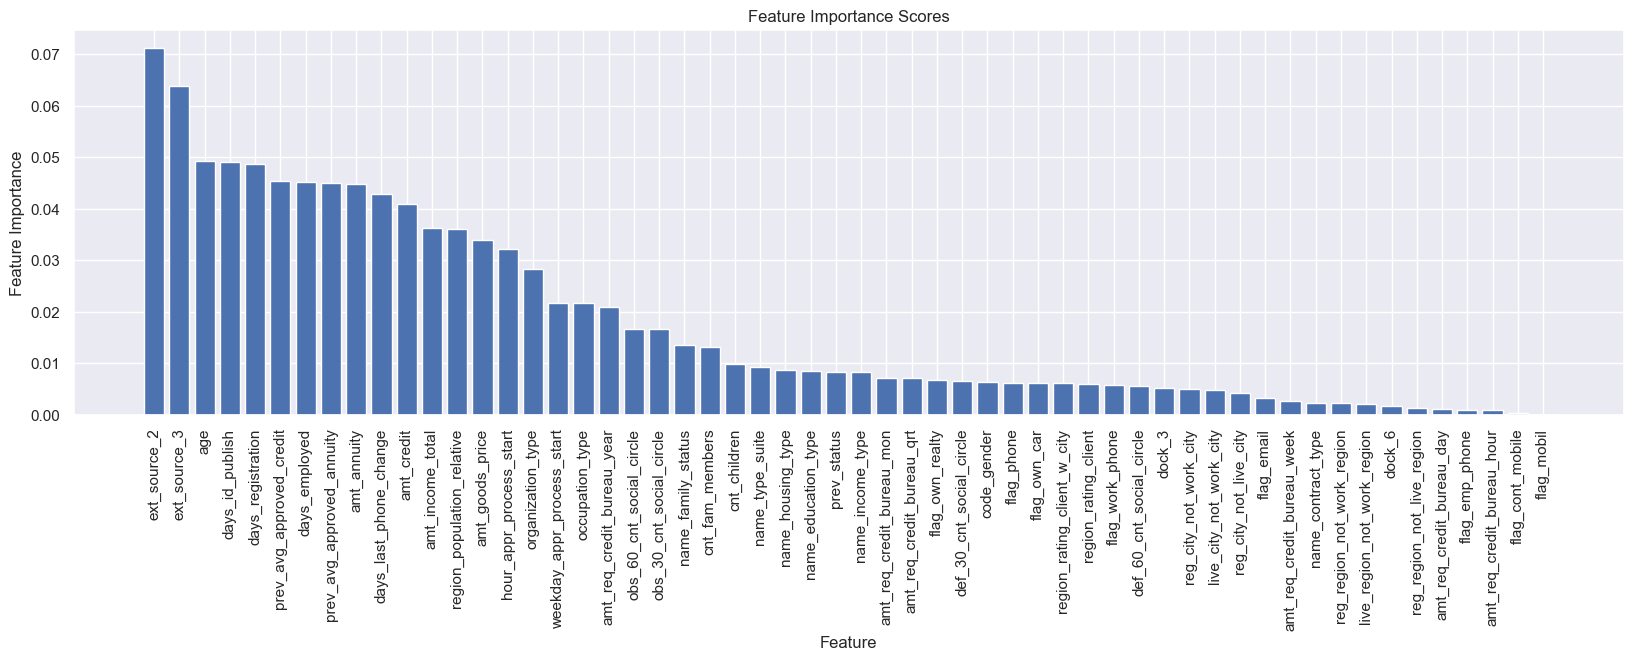

In [265]:
sorted_idx = np.argsort(feature_importance)[::-1]
feature_names = x_train.columns


plt.figure(figsize=(20, 5))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align='center');
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Scores")
plt.show()

> **Note** 2 of the 3 columns we aggregated from the previous applications are in the most 10 important features. 😉

In [266]:
df_status = pd.DataFrame()

df_status['Features'] = x_train.columns
df_status['Importance'] = feature_importance

df_status = df_status.merge(vif_df, on='Features').sort_values(by='Importance', ascending=False)

In [267]:
df_status.head()

,Features,Importance,VIF
38,ext_source_2,0.071137,9.968921
39,ext_source_3,0.063918,10.559567
15,age,0.049332,33.730950
18,days_id_publish,0.049030,5.660445
17,days_registration,0.048763,3.490281


In [268]:
most_important_features = df_status.sort_values(by='Importance', ascending=False).head(3)['Features'].values.tolist()
highest_vif = df_status.sort_values(by='VIF', ascending=False).head(3)['Features'].values.tolist()

extreme_features = most_important_features + highest_vif
extreme_df = df_status.query(f'Features in {extreme_features}')

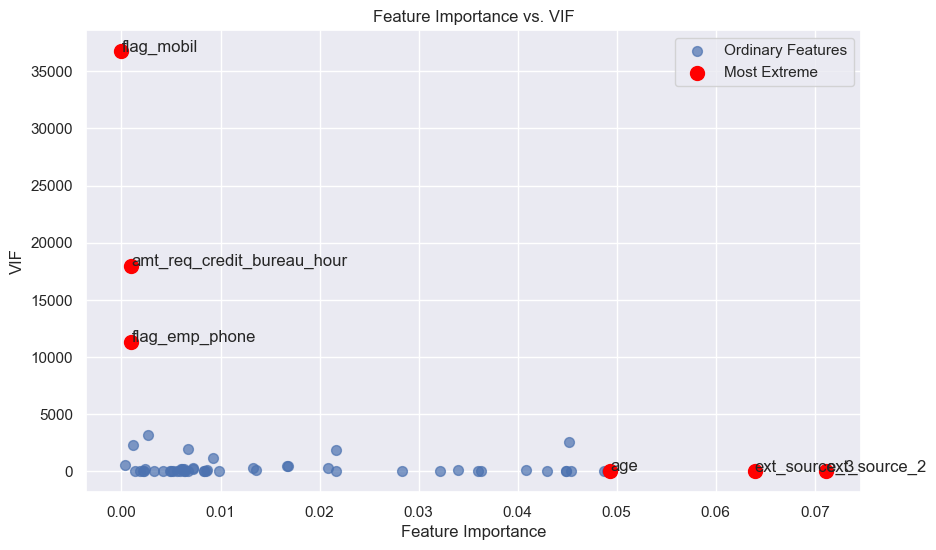

In [270]:
plt.figure(figsize=(10, 6))
plt.scatter(x = df_status['Importance'],  y = df_status['VIF'],  marker='o', s=50, alpha=0.7, label='Ordinary Features')
plt.scatter(x = extreme_df['Importance'], y = extreme_df['VIF'], marker='o', c='red', s=100, label='Most Extreme')

for idx, row in df_status.iterrows():
    if row['Features'] in extreme_features:
        feature = row['Features']
        importance_of_feature = row['Importance']
        vif_of_feature = row['VIF']
        location = (importance_of_feature, vif_of_feature)
        plt.annotate(feature, location)
        
        
plt.xlabel("Feature Importance")
plt.ylabel("VIF")
plt.title("Feature Importance vs. VIF")

plt.legend();

> * We will make use of the features with `High importance` & `Low Vif`.
>
> * Lets detect the features that has:
>   * Importance < 0.01
>   * VIF > 100

In [271]:
importance_thershould = 0.01
vif_threshould = 10

columns_to_drop = df_status.query(f'Importance < {importance_thershould} and VIF > {vif_threshould}')['Features'].values.tolist()
columns_to_drop

['name_type_suite',
 'name_housing_type',
 'name_education_type',
 'name_income_type',
 'amt_req_credit_bureau_mon',
 'amt_req_credit_bureau_qrt',
 'flag_own_realty',
 'code_gender',
 'flag_own_car',
 'region_rating_client_w_city',
 'region_rating_client',
 'amt_req_credit_bureau_week',
 'name_contract_type',
 'amt_req_credit_bureau_day',
 'flag_emp_phone',
 'amt_req_credit_bureau_hour',
 'flag_cont_mobile',
 'flag_mobil']

In [272]:
x_train.drop(columns=columns_to_drop, inplace=True)
x_test.drop(columns=columns_to_drop, inplace=True)

### Conclusion

In [273]:
print(f'There are only {x_train.shape[1]} features are promising we got them from our EDA')

There are only 38 features are promising we got them from our EDA


## Modeling

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [95]:
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=123)

In [97]:
xgb_classifier.fit(x_train, y_train)
predictions = xgb_classifier.predict(x_test)
cm = confusion_matrix(y_test, predictions)


array([[56366,   180],
       [ 4793,   155]], dtype=int64)

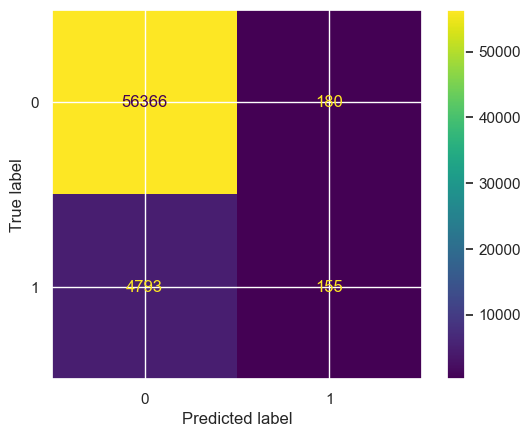

In [100]:
ConfusionMatrixDisplay(cm).plot();

In [104]:
print(f'Recall: {recall_score(y_test, predictions)}\nPrecision: {precision_score(y_test, predictions)}')

Recall: 0.03132578819725142
Precision: 0.4626865671641791


> We need some of tuning the model to handel the impalanced data.

In [109]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 4, 5],                # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'subsample': [0.8, 0.9, 1.0],         # Fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for training
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform a grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='roc_auc', cv=cv, verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(x_train, y_train)

predictions = best_model.predict(x_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [205]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("Decision Tree", DecisionTreeClassifier())
]


accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

In [206]:
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    accuracy_scores[model_name] = accuracy
    precision_scores[model_name] = precision
    recall_scores[model_name] = recall
    f1_scores[model_name] = f1

In [207]:
for model_name, model in models:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_scores[model_name]}")
    print(f"Precision: {precision_scores[model_name]}")
    print(f"Recall: {recall_scores[model_name]}")
    print(f"F1 Score: {f1_scores[model_name]}")

Model: Logistic Regression
Accuracy: 0.9195368653852408
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Model: Random Forest
Accuracy: 0.9196344358799232
Precision: 0.5833333333333334
Recall: 0.004244139046079224
F1 Score: 0.008426966292134831
Model: XGBoost
Accuracy: 0.9191303216573975
Precision: 0.4626865671641791
Recall: 0.03132578819725142
F1 Score: 0.05867878099564642
Model: Decision Tree
Accuracy: 0.851367613100465
Precision: 0.1410958904109589
Recall: 0.16653193209377526
F1 Score: 0.15276232851316277
